In [13]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

0.4552132752443246
0.4556242261225194


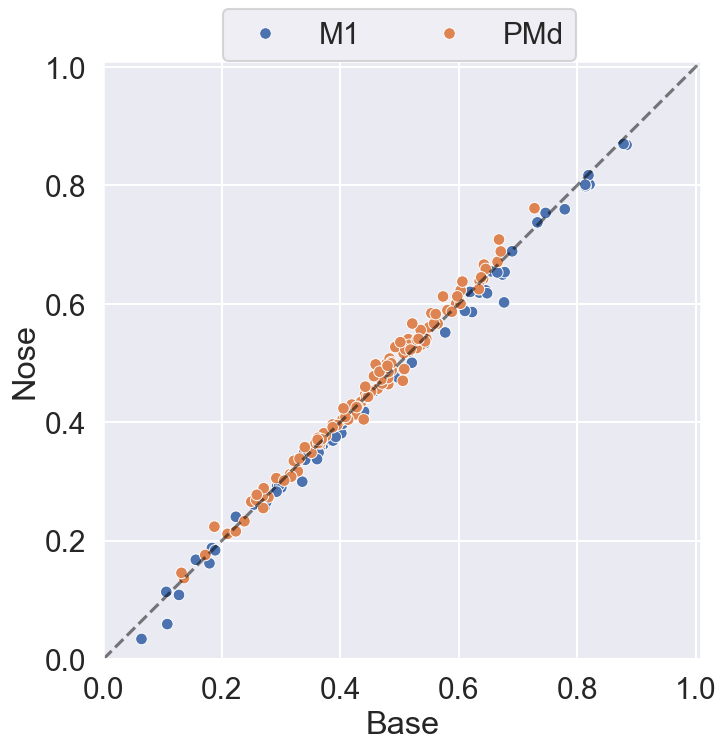

In [45]:
areas = ["M1"] * 62 + ["PMd"] * 121

with open("predictions/gbyk_overlapless_rnn_pred.pkl", "rb") as f:
    base = pickle.load(f)

with open("predictions/gbyk_diff_overlapless_rnn_pred.pkl", "rb") as f:
    diff = pickle.load(f)

with open("gbyk.pkl", "rb") as f:
    data = pickle.load(f)
    gt = data["test"]["keno_0"]["spikes"]


base_corr = np.array(
    [
        [np.corrcoef(base[i][:, ch], gt[i][:, ch])[0, 1] for ch in range(len(areas))]
        for i in range(len(gt))
    ]
)
base_corr = np.mean(base_corr, axis=0)
print(base_corr.mean())

diff_corr = np.array(
    [
        [np.corrcoef(diff[i][:, ch], gt[i][:, ch])[0, 1] for ch in range(len(areas))]
        for i in range(len(gt))
    ]
)
diff_corr = np.mean(diff_corr, axis=0)
print(diff_corr.mean())

base_diff_pd = pd.DataFrame(
    {"base": base_corr, "diff": diff_corr, "area": areas}
)

# sns.set_theme(rc={"figure.figsize": (8, 8)})
# sns.set_context("talk", font_scale=1.3)

min_val, max_val = 0, 1.01
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.xticks(np.arange(0, 1.01, 0.2))
plt.yticks(np.arange(0, 1.01, 0.2))
plt.axis("scaled")
sns.scatterplot(base_diff_pd, x="base", y="diff", hue="area", s=70)
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    color="black",
    alpha=0.5,
)
plt.xlabel("Base")
plt.ylabel("Nose")
plt.legend(ncols=2, loc=(0.2, 1))
plt.tight_layout()

0.4383831152371456


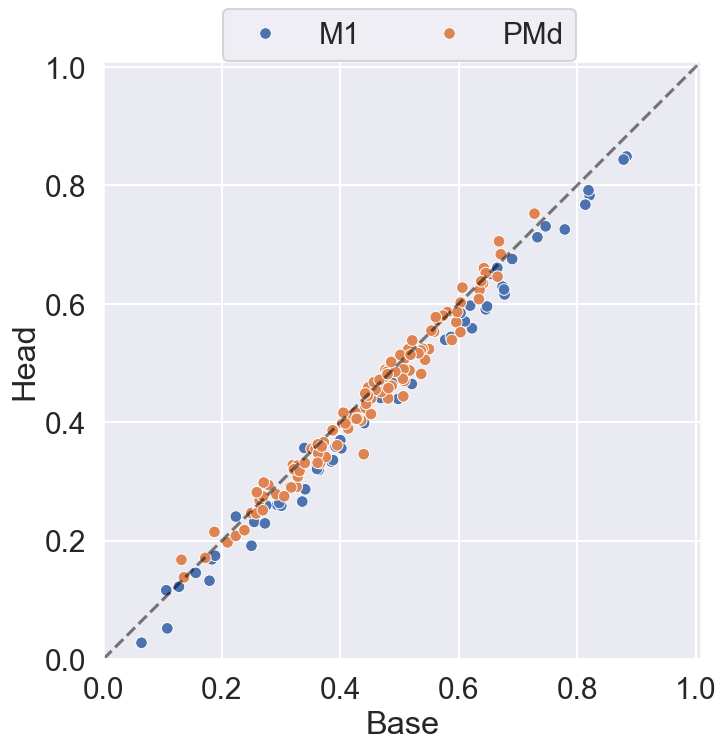

In [46]:
with open("predictions/gbyk_head_overlapless_rnn_pred.pkl", "rb") as f:
    head = pickle.load(f)

head_corr = np.array(
    [
        [np.corrcoef(head[i][:, ch], gt[i][:, ch])[0, 1] for ch in range(len(areas))]
        for i in range(len(gt))
    ]
)
head_corr = np.mean(head_corr, axis=0)
print(head_corr.mean())
base_head_pd = pd.DataFrame(
    {"base": base_corr, "head": head_corr, "area": areas}
)

min_val, max_val = 0, 1.01
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.xticks(np.arange(0, 1.01, 0.2))
plt.yticks(np.arange(0, 1.01, 0.2))
plt.axis("scaled")
sns.scatterplot(base_head_pd, x="base", y="head", hue="area", s=70)
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    color="black",
    alpha=0.5,
)
plt.xlabel("Base")
plt.ylabel("Head")
plt.legend(ncols=2, loc=(0.2, 1))
plt.tight_layout()